In [191]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import cufflinks as cf
from plotly.plotly import iplot
from plotly.offline import plot

In [192]:
df = pd.read_csv('../input/arrests.csv')
df.tail()

,Border,Sector,State/Territory,2000 (All Illegal Immigrants),2000 (Mexicans Only),2001 (All Illegal Immigrants),2001 (Mexicans Only),2002 (All Illegal Immigrants),2002 (Mexicans Only),2003 (All Illegal Immigrants),2003 (Mexicans Only),2004 (All Illegal Immigrants),2004 (Mexicans Only),2005 (All Illegal Immigrants),2005 (Mexicans Only),2006 (All Illegal Immigrants),2006 (Mexicans Only),2007 (All Illegal Immigrants),2007 (Mexicans Only),2008 (All Illegal Immigrants),2008 (Mexicans Only),2009 (All Illegal Immigrants),2009 (Mexicans Only),2010 (All Illegal Immigrants),2010 (Mexicans Only),2011 (All Illegal Immigrants),2011 (Mexicans Only),2012 (All Illegal Immigrants),2012 (Mexicans Only),2013 (All Illegal Immigrants),2013 (Mexicans Only),2014 (All Illegal Immigrants),2014 (Mexicans Only),2015 (All Illegal Immigrants),2015 (Mexicans Only),2016 (All Illegal Immigrants),2016 (Mexicans Only)
20,Southwest,San Diego,CA,151681,150599,110075,109281,100681,99551,111515,109919,138608,136847,126904,124947,142104.0,140821.0,152460.0,151140.0,162390.0,160818.0,118721.0,117227.0,68565.0,67259.0,42447.0,41281.0,28461.0,27307.0,27496.0,26223.0,29911.0,27871.0,26290.0,24269.0,31891.0,25380.0
21,Southwest,Tucson,AZ,616346,614145,449675,446471,333648,329991,347263,341971,491771,482990,439079,426416,392074.0,382610.0,378239.0,366456.0,317696.0,305429.0,241673.0,230045.0,212202.0,195921.0,123285.0,111974.0,120000.0,102303.0,120939.0,101092.0,87915.0,68870.0,63397.0,48916.0,64891.0,46494.0
22,Southwest,Yuma,"CA, AZ",108747,108236,78385,77974,42654,42260,56638,55927,98060,96640,138438,136767,118549.0,117553.0,37992.0,37380.0,8363.0,8016.0,6951.0,6546.0,7116.0,6705.0,5833.0,5416.0,6500.0,5919.0,6106.0,5286.0,5902.0,4247.0,7142.0,3845.0,14170.0,3513.0
23,Southwest,All,"CA, AZ, NM, TX",1643679,1615081,1235718,1205390,929809,901761,905065,865850,1139282,1073468,1171396,1016409,1071972.0,973819.0,858638.0,800634.0,705005.0,653035.0,540865.0,495582.0,447731.0,396819.0,327577.0,280580.0,356873.0,262341.0,414397.0,265409.0,479371.0,226771.0,331333.0,186017.0,408870.0,190760.0
24,United States,NaN,USA,1676438,1636883,1266214,1224047,955310,917993,931557,882012,1160395,1085006,1189075,1023905,1089092.0,981066.0,876704.0,808688.0,723825.0,661766.0,556041.0,503386.0,463382.0,404365.0,340252.0,286154.0,364768.0,265755.0,420789.0,267734.0,486651.0,229178.0,337117.0,188122.0,415816.0,192969.0


In [193]:
df = df[df.Border != 'United States']

**Remove Mexican columns to analyze the whole picture**

In [194]:
df2 = df.copy()
df2 = df2.drop(df2.iloc[:,[4,6,8,10,12,14,16,18,20,22,24,26,28,30,32,34,36]], axis=1)
df2.tail()

,Border,Sector,State/Territory,2000 (All Illegal Immigrants),2001 (All Illegal Immigrants),2002 (All Illegal Immigrants),2003 (All Illegal Immigrants),2004 (All Illegal Immigrants),2005 (All Illegal Immigrants),2006 (All Illegal Immigrants),2007 (All Illegal Immigrants),2008 (All Illegal Immigrants),2009 (All Illegal Immigrants),2010 (All Illegal Immigrants),2011 (All Illegal Immigrants),2012 (All Illegal Immigrants),2013 (All Illegal Immigrants),2014 (All Illegal Immigrants),2015 (All Illegal Immigrants),2016 (All Illegal Immigrants)
19,Southwest,Rio Grande Valley,TX,133243,107844,89927,77749,92947,134186,110528.0,73430.0,75473.0,60989.0,59766.0,59243.0,97762.0,154453.0,256393.0,147257.0,186830.0
20,Southwest,San Diego,CA,151681,110075,100681,111515,138608,126904,142104.0,152460.0,162390.0,118721.0,68565.0,42447.0,28461.0,27496.0,29911.0,26290.0,31891.0
21,Southwest,Tucson,AZ,616346,449675,333648,347263,491771,439079,392074.0,378239.0,317696.0,241673.0,212202.0,123285.0,120000.0,120939.0,87915.0,63397.0,64891.0
22,Southwest,Yuma,"CA, AZ",108747,78385,42654,56638,98060,138438,118549.0,37992.0,8363.0,6951.0,7116.0,5833.0,6500.0,6106.0,5902.0,7142.0,14170.0
23,Southwest,All,"CA, AZ, NM, TX",1643679,1235718,929809,905065,1139282,1171396,1071972.0,858638.0,705005.0,540865.0,447731.0,327577.0,356873.0,414397.0,479371.0,331333.0,408870.0


**Fill null value with 0**

In [195]:
df2.isnull().sum()

Border                           0
Sector                           0
State/Territory                  0
2000 (All Illegal Immigrants)    0
2001 (All Illegal Immigrants)    0
2002 (All Illegal Immigrants)    0
2003 (All Illegal Immigrants)    0
2004 (All Illegal Immigrants)    0
2005 (All Illegal Immigrants)    0
2006 (All Illegal Immigrants)    1
2007 (All Illegal Immigrants)    1
2008 (All Illegal Immigrants)    1
2009 (All Illegal Immigrants)    1
2010 (All Illegal Immigrants)    1
2011 (All Illegal Immigrants)    1
2012 (All Illegal Immigrants)    1
2013 (All Illegal Immigrants)    1
2014 (All Illegal Immigrants)    1
2015 (All Illegal Immigrants)    1
2016 (All Illegal Immigrants)    1
dtype: int64

In [196]:
df2.fillna(0, inplace=True)

**Plot for numbers of illegal immigrants arrested each year with quantity in y-axis and years in x-axis**

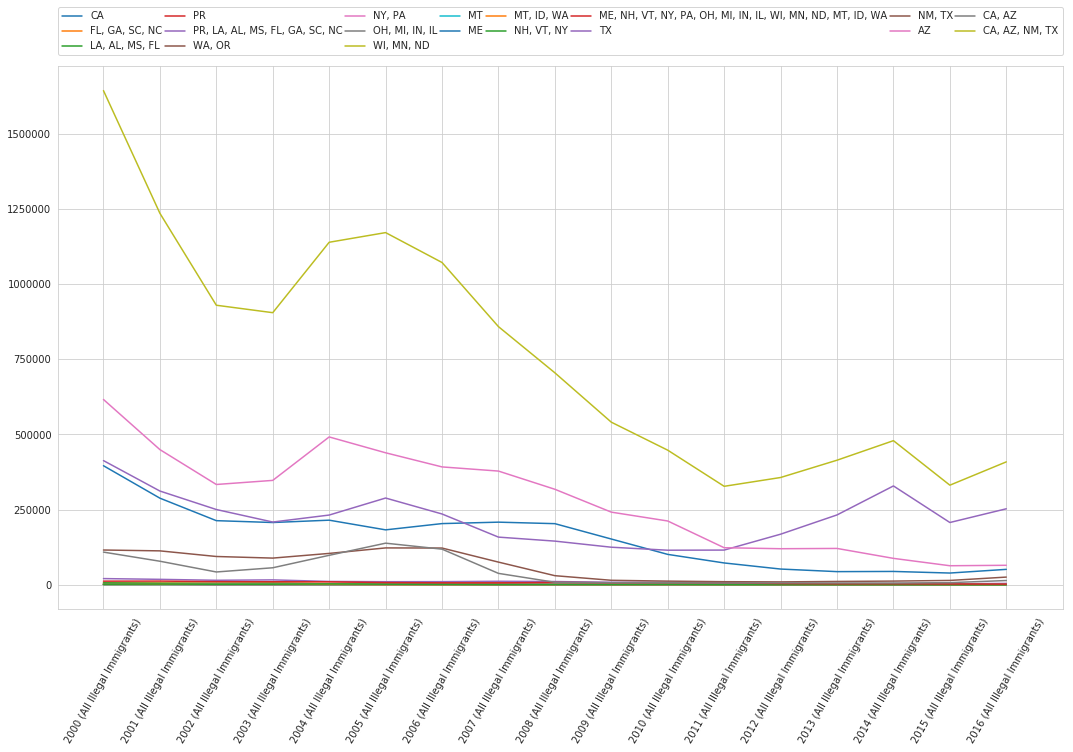

In [197]:
area_list = list(df2['State/Territory'].unique())
year_list = list(df2.iloc[:,3:].columns)

plt.figure(figsize=(18,10))
for ar in area_list:
    year_immigrant = []
    for yr in year_list:
        year_immigrant.append(df[yr][df2['State/Territory'] == ar].sum())
    plt.plot(year_immigrant, label=ar)
plt.xticks(np.arange(18), tuple(year_list), rotation=60)
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, ncol=8, mode="expand", borderaxespad=0.)
plt.savefig('p.png')
plt.show()

**Comopare different borders**

In [198]:
df4 = df2.groupby('Border').sum().reset_index()
df4['Total'] = df4.sum(axis=1)

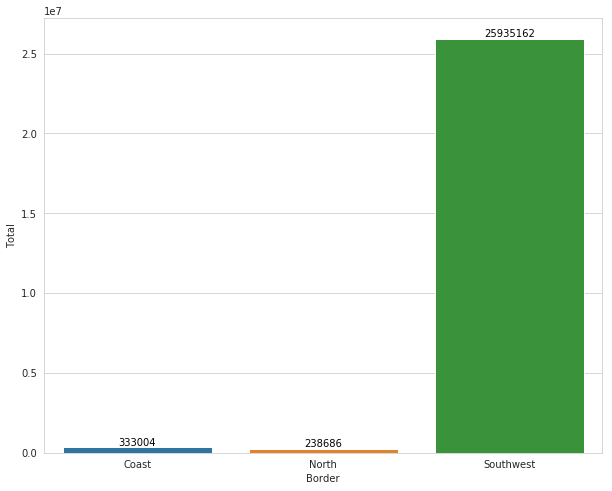

In [199]:
plt.figure(figsize=(10,8))
ax = sns.barplot(x=df4['Border'],y=df4['Total'])
sns.set_style('whitegrid')
for p in ax.patches:
     ax.text(p.get_x() + p.get_width()/2., p.get_height(),  '%d' % int(p.get_height()),
            fontsize=10, color='black', ha='center', va='bottom')

**Apparently the main area where illegal immigrant were arrested is Southwest, and the reason is because the majority of illegal immigrants are Mexicans**

**plot a heatmap of correlation of arrested illegal immigrants in difference years**

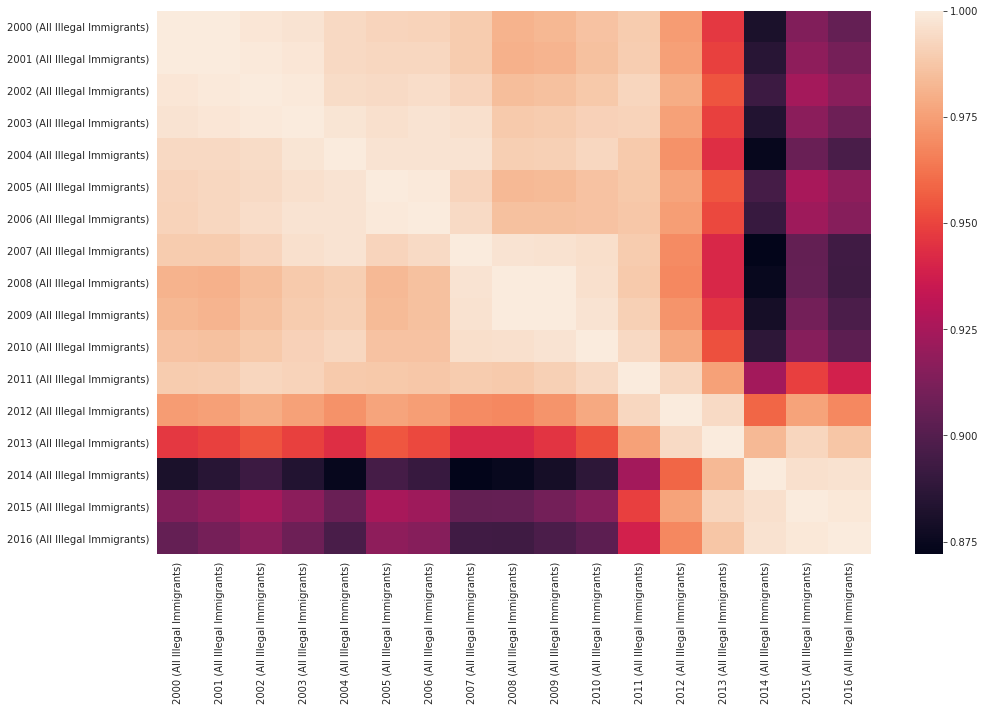

In [200]:
df3 = df2.copy()
df3.drop(['Border','Sector'], axis=1, inplace=True)
df3.set_index('State/Territory')

year_df = df3.iloc[:,:]
plt.figure(figsize=(16,10))
sns.heatmap(year_df.corr())

**Heatmap of States of illegal immigrants arrested over years**

**This will detect the states where arrested illegal immigrants have drastically changed over the years**

In [201]:
df3 = df3.set_index('State/Territory')

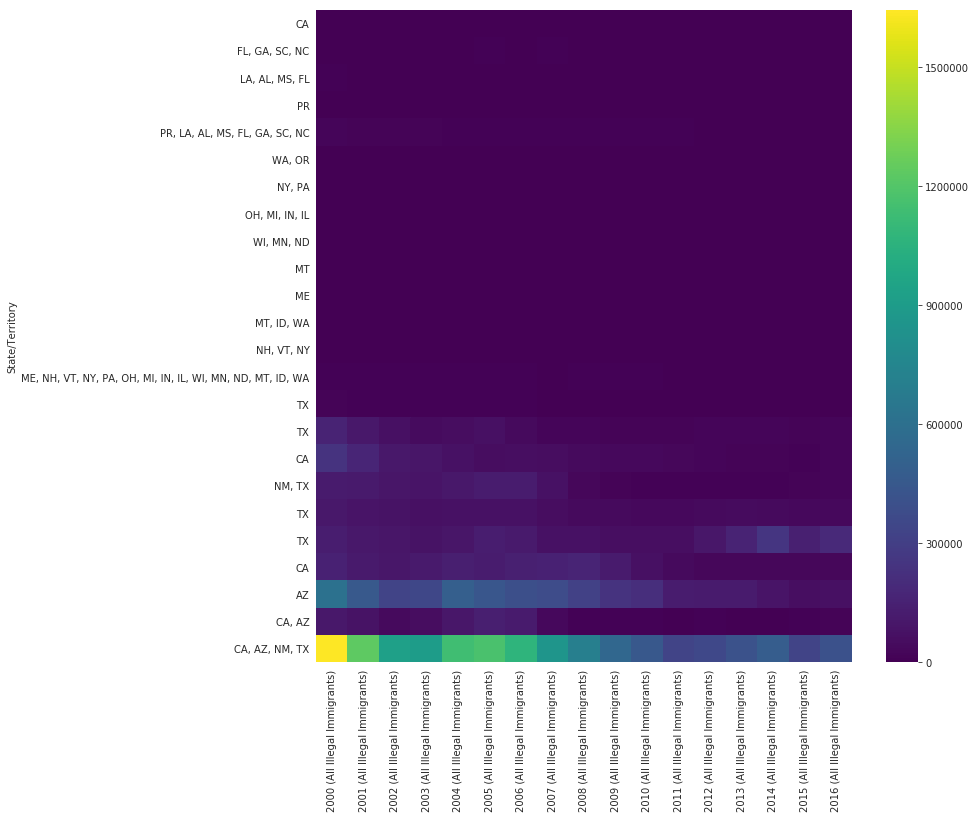

In [202]:
fig, ax = plt.subplots(figsize=(12,12))
sns.heatmap(df3, ax=ax, cmap='viridis')
ax.set_yticklabels(df3.index)
plt.show()

**K-means clustering**

In [203]:
X = df3.iloc[:,:].values

Text(0, 0.5, 'wcss')

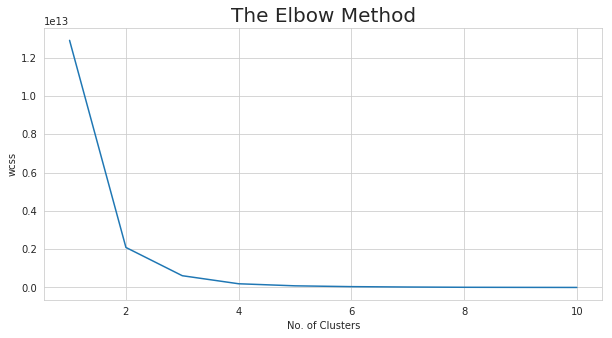

In [204]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
    km.fit(X)
    wcss.append(km.inertia_)
plt.figure(figsize=(10,5))
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')

**As the elbow corner coincides with x=2, we will have to form 2 clusters. Now, we apply k-means algorithm**


In [205]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 1)
y_means = km.fit_predict(X)

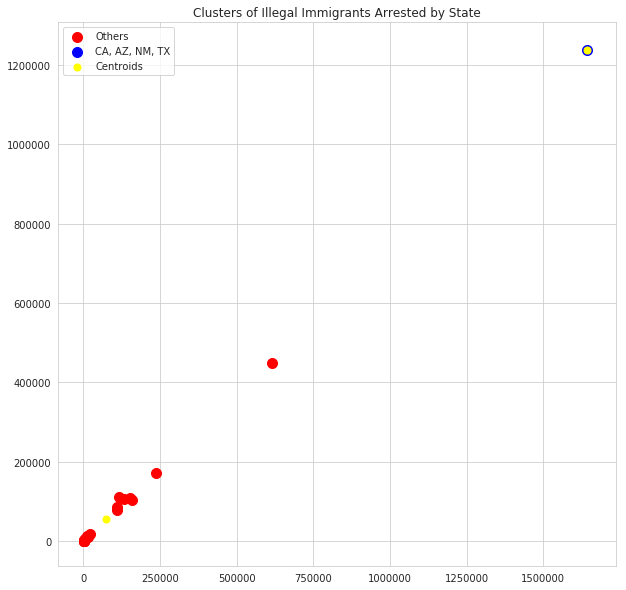

In [207]:
plt.figure(figsize=(10,10))

plt.scatter(X[y_means == 0, 0], X[y_means == 0,1],s=100,c='red',label='Others')
plt.scatter(X[y_means == 1, 0], X[y_means == 1,1],s=100,c='blue',label='CA, AZ, NM, TX')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],s=50,c='yellow',label='Centroids')
plt.title('Clusters of Illegal Immigrants Arrested by State')
plt.legend()
plt.show()

**So, the blue cluster represents CA, AZ, NM,TX while the red cluster represents all the other states. **